# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


# Read CSV file and Show First Few Rows

In [6]:
df = pd.read_csv('rainfalldata.csv')
df.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANUALL,Jan-Feb,Mar-May,Jun-Sept,Oct-Dec
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


# Handle missing values

In [9]:
df = df.dropna()

# Ensure date column is in datetime format

In [10]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

# Aggregate data

In [7]:
df_grouped = df.groupby('YEAR').sum()


# Plot annual rainfall trends

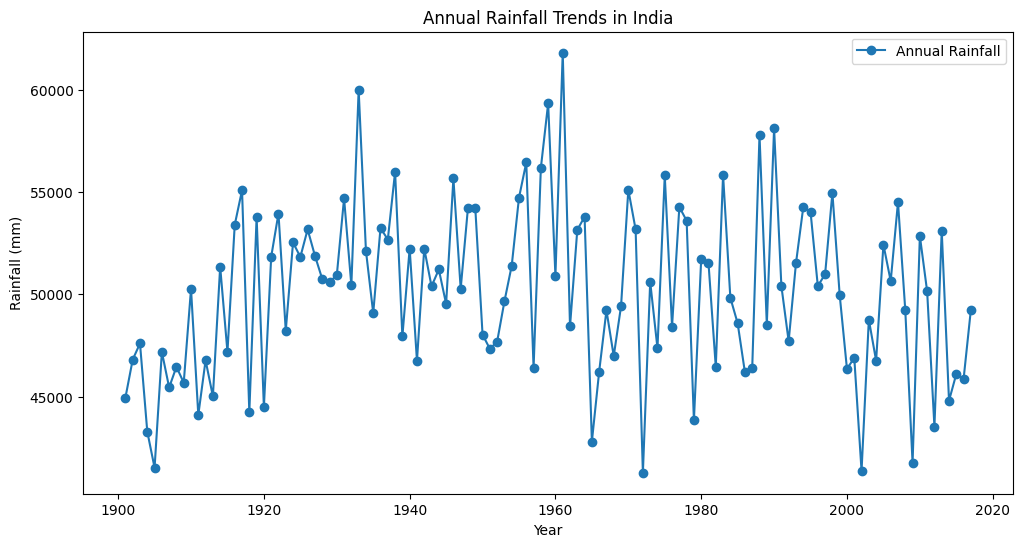

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped['ANUALL'], marker='o', label='Annual Rainfall')
plt.title('Annual Rainfall Trends in India')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()



# Visualize regional rainfall distribution

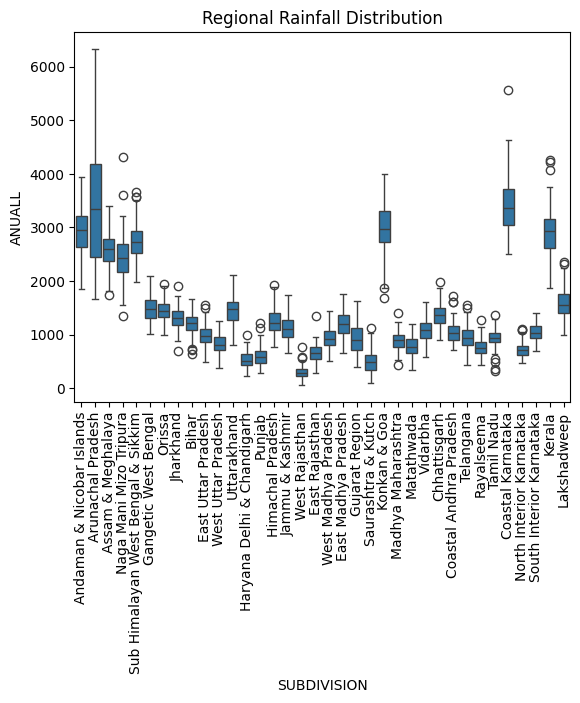

In [16]:
sns.boxplot(data=df, x='SUBDIVISION', y='ANUALL')
plt.title('Regional Rainfall Distribution')
plt.xticks(rotation=90)
plt.show()


# Linear regression to analyze trends

In [19]:
slope, intercept, r_value, p_value, std_err = linregress(df_grouped.index.year, df_grouped['ANUALL'])

print(f"Slope: {slope}, P-value: {p_value}")

if p_value < 0.05:
    print("Significant trend detected.")
else:
    print("No significant trend detected.")


Slope: 4.2526090605284, P-value: 0.7119381821404994
No significant trend detected.


In [24]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

# ARIMA model for rainfall prediction


In [ ]:
model = ARIMA(df_grouped['ANUALL'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)

print("Rainfall Forecast:\n",  forecast)

Rainfall Forecast:
 2018-01-01    47816.264391
2019-01-01    47706.843485
2020-01-01    47698.482121
2021-01-01    47697.843190
2022-01-01    47697.794366
Freq: YS-JAN, Name: predicted_mean, dtype: float64
